In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

In [2]:
df_lebron = pd.read_csv('Data/1_lebron_james_shot_chart_1_2023.csv')
df_harden = pd.read_csv('Data/2_james_harden_shot_chart_2023.csv')
df_curry = pd.read_csv('Data/3_stephen_curry_shot_chart_2023.csv')

df_lebron['player'] = 'LeBron James'
df_harden['player'] = 'James Harden'
df_curry['player'] = 'Stephen Curry'

df = pd.concat([df_lebron, df_harden, df_curry])

In [3]:
print(df.head(3))

   top  left          date      qtr time_remaining  result  shot_type  \
0  310   203  Oct 18, 2022  1st Qtr          09:26   False          3   
1  213   259  Oct 18, 2022  1st Qtr          08:38   False          2   
2  143   171  Oct 18, 2022  1st Qtr          08:10   False          2   

   distance_ft   lead  lebron_team_score  opponent_team_score opponent team  \
0           26  False                  2                    2      GSW  LAL   
1           16  False                  4                    5      GSW  LAL   
2           11  False                  4                    7      GSW  LAL   

   season color        player  
0    2023   red  LeBron James  
1    2023   red  LeBron James  
2    2023   red  LeBron James  


In [4]:
print(df.dtypes)

top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
player                 object
dtype: object


In [5]:
print(df.describe())

               top         left    shot_type  distance_ft  lebron_team_score  \
count  3992.000000  3992.000000  3992.000000  3992.000000        3992.000000   
mean    175.107465   245.341433     2.444389    15.829409          60.269038   
std     101.823594   104.620149     0.496960    10.815748          34.788530   
min      26.000000    -3.000000     2.000000     0.000000           0.000000   
25%      73.000000   197.000000     2.000000     4.000000          32.000000   
50%     159.000000   241.000000     2.000000    18.000000          61.000000   
75%     279.000000   301.000000     3.000000    26.000000          89.000000   
max     389.000000   483.000000     3.000000    36.000000         140.000000   

       opponent_team_score  season  
count          3992.000000  3992.0  
mean             59.195391  2023.0  
std              34.793372     0.0  
min               0.000000  2023.0  
25%              31.000000  2023.0  
50%              59.000000  2023.0  
75%              88.

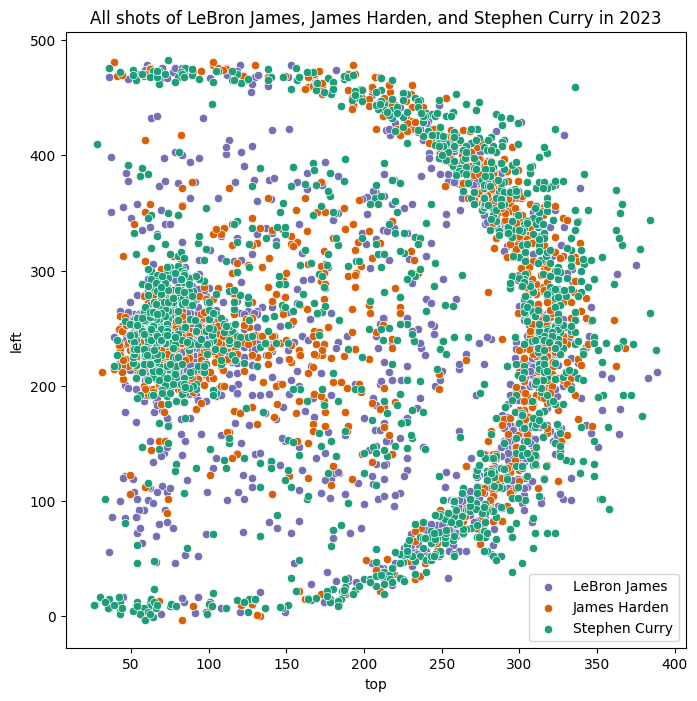

In [6]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df[df['player']=='LeBron James'], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df[df['player']== 'James Harden'], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df[df['player']== 'Stephen Curry'], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()


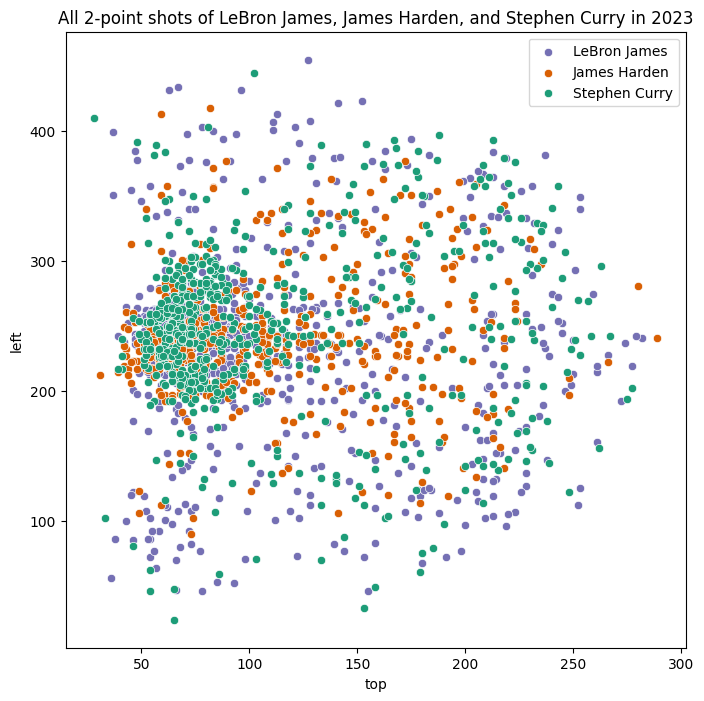

In [7]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 2) & (df['player'] == 'LeBron James')], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 2) & (df['player'] == 'James Harden')], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 2) & (df['player'] == 'Stephen Curry')], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All 2-point shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()


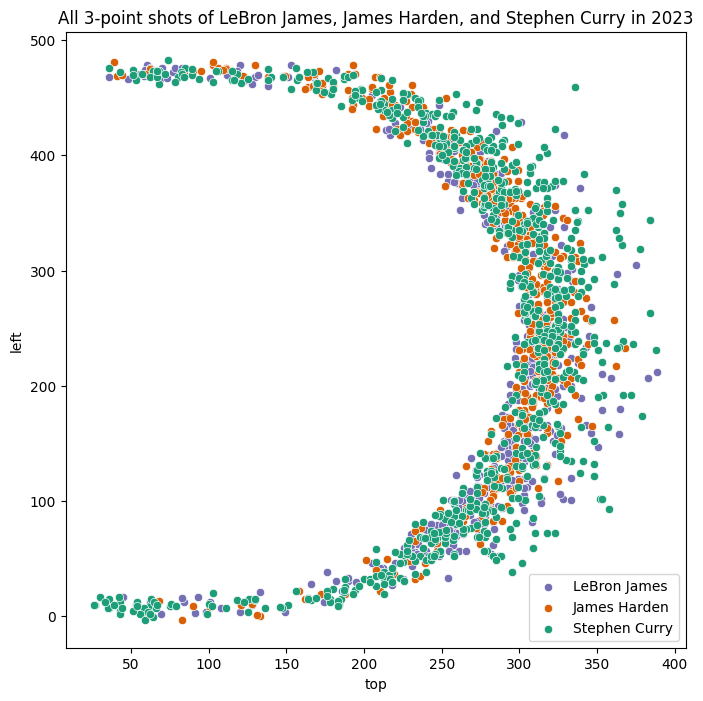

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 3) & (df['player'] == 'LeBron James')], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 3) & (df['player'] == 'James Harden')], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df[(df['shot_type'] == 3) & (df['player'] == 'Stephen Curry')], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All 3-point shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()

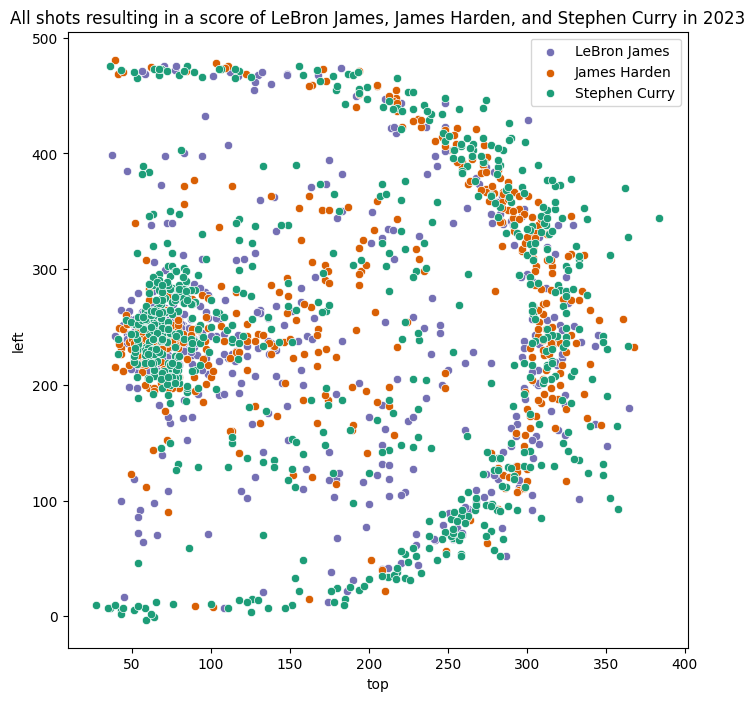

In [9]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df[(df['result']) & (df['player'] == 'LeBron James')], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df[(df['result']) & (df['player'] == 'James Harden')], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df[(df['result']) & (df['player'] == 'Stephen Curry')], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All shots resulting in a score of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()

In [10]:
df['angle'] = np.degrees(np.arctan2(df['top'], 250 - df['left']))
df['angle'] = df['angle'].apply(lambda x: x - 90 )


In [11]:
light_colors = ['#7fe888', '#aaaaff', '#ffb279']  
dark_colors = ['#1d7f46', '#3a396c', '#b25e10'] 
players = ['Stephen Curry', 'LeBron James', 'James Harden']

df['minutes_remaining'] = df['time_remaining'].apply(lambda x: int(x.split(':')[0]))
df['hours_remaining'] = df['time_remaining'].apply(lambda x: int(x.split(':')[1]))

num_players = len(players)


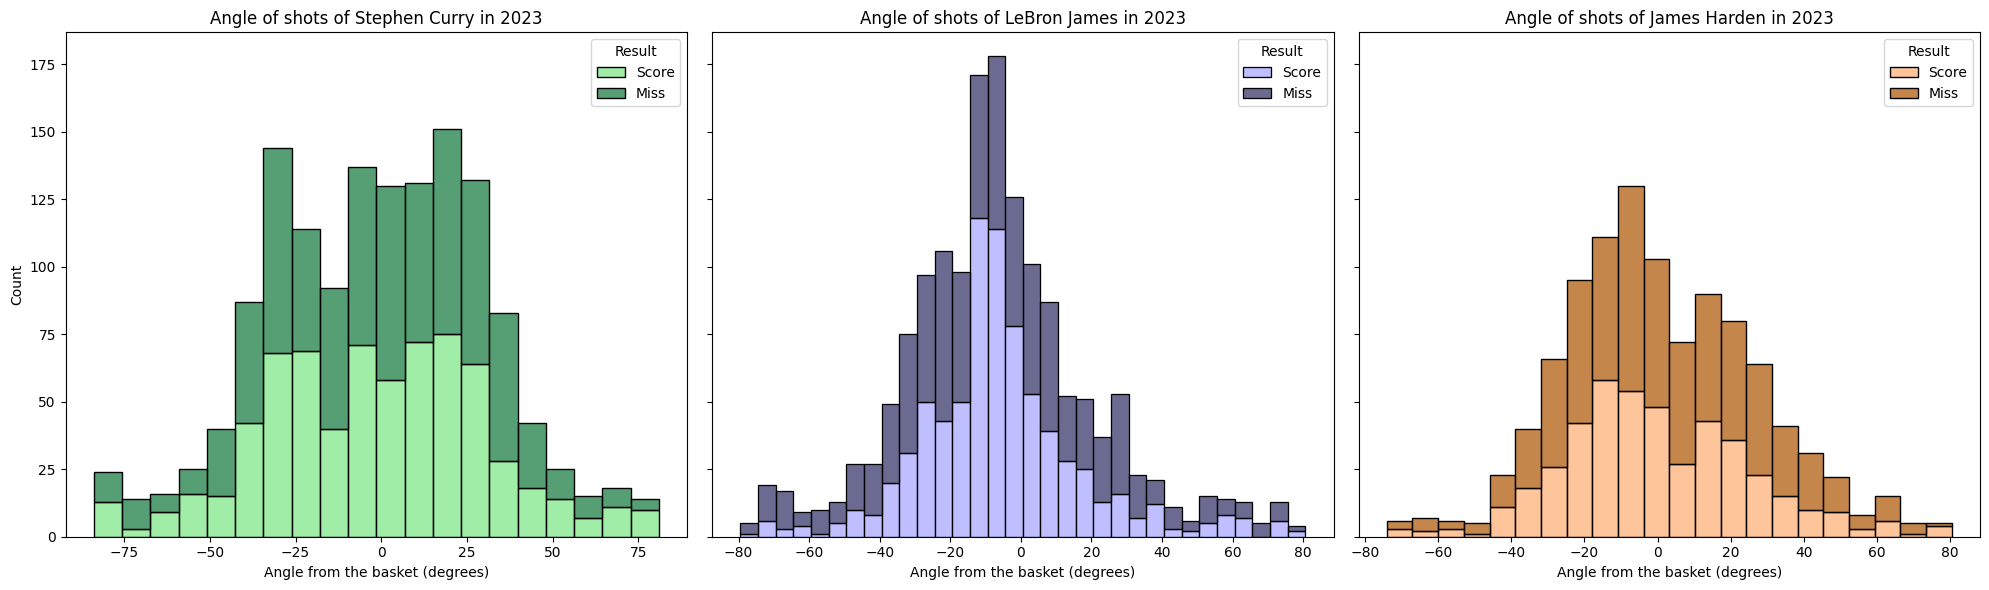

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for i, player in enumerate(players):
    sns.histplot(data=df[df['player'] == player], x='angle', hue='result', palette={True: light_colors[i], False: dark_colors[i]}, multiple='stack', ax=axes[i])
    axes[i].set_title(f'Angle of shots of {player} in 2023')
    axes[i].set_xlabel('Angle from the basket (degrees)')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Result', labels=['Score', 'Miss'])

plt.tight_layout()
plt.show()


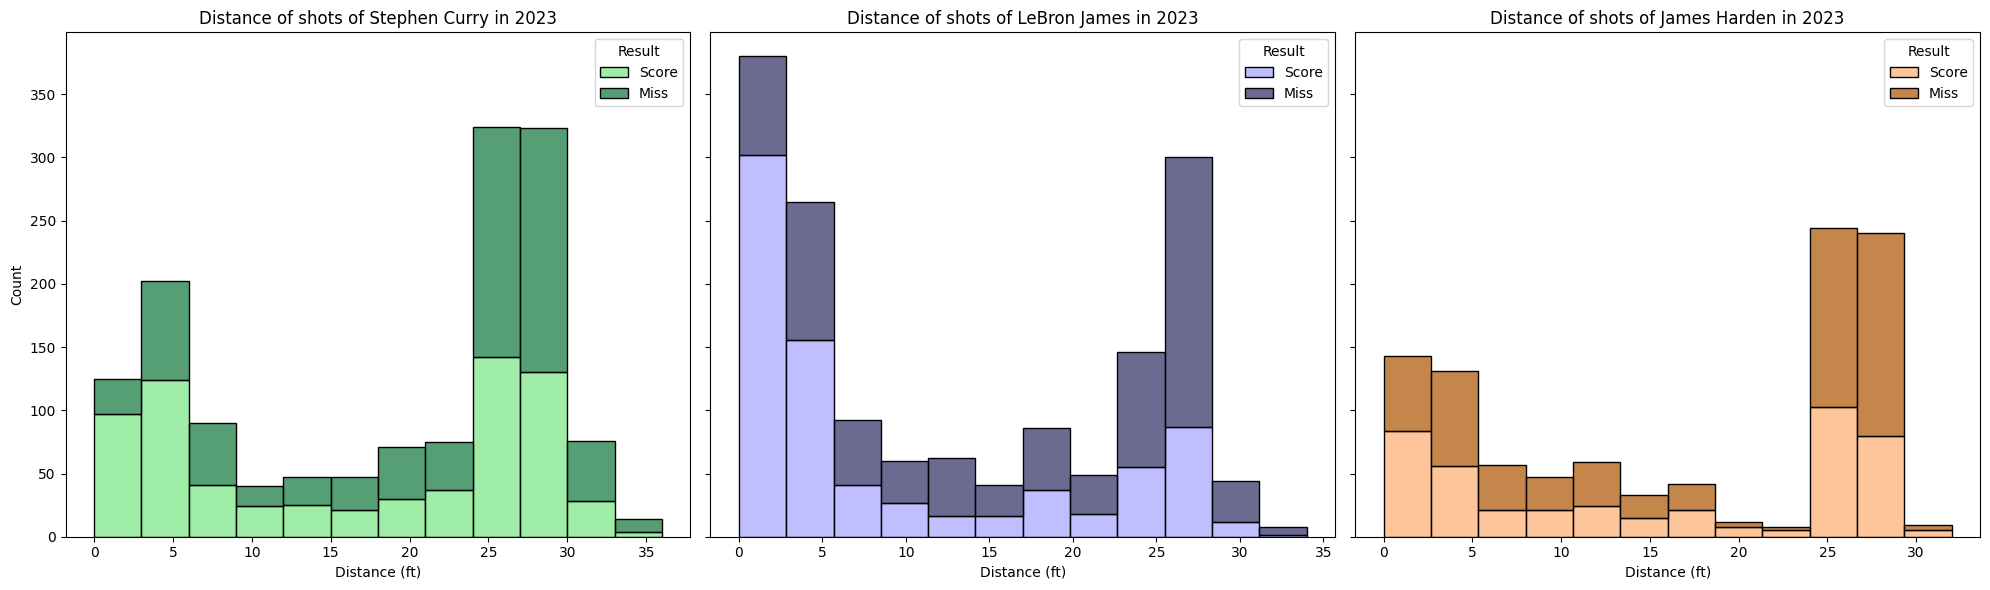

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for i, player in enumerate(players):
    sns.histplot(data=df[df['player'] == player], x='distance_ft', hue='result', palette={True: light_colors[i], False: dark_colors[i]}, multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distance of shots of {player} in 2023')
    axes[i].set_xlabel('Distance (ft)')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Result', labels=['Score', 'Miss'])

plt.tight_layout()
plt.show()






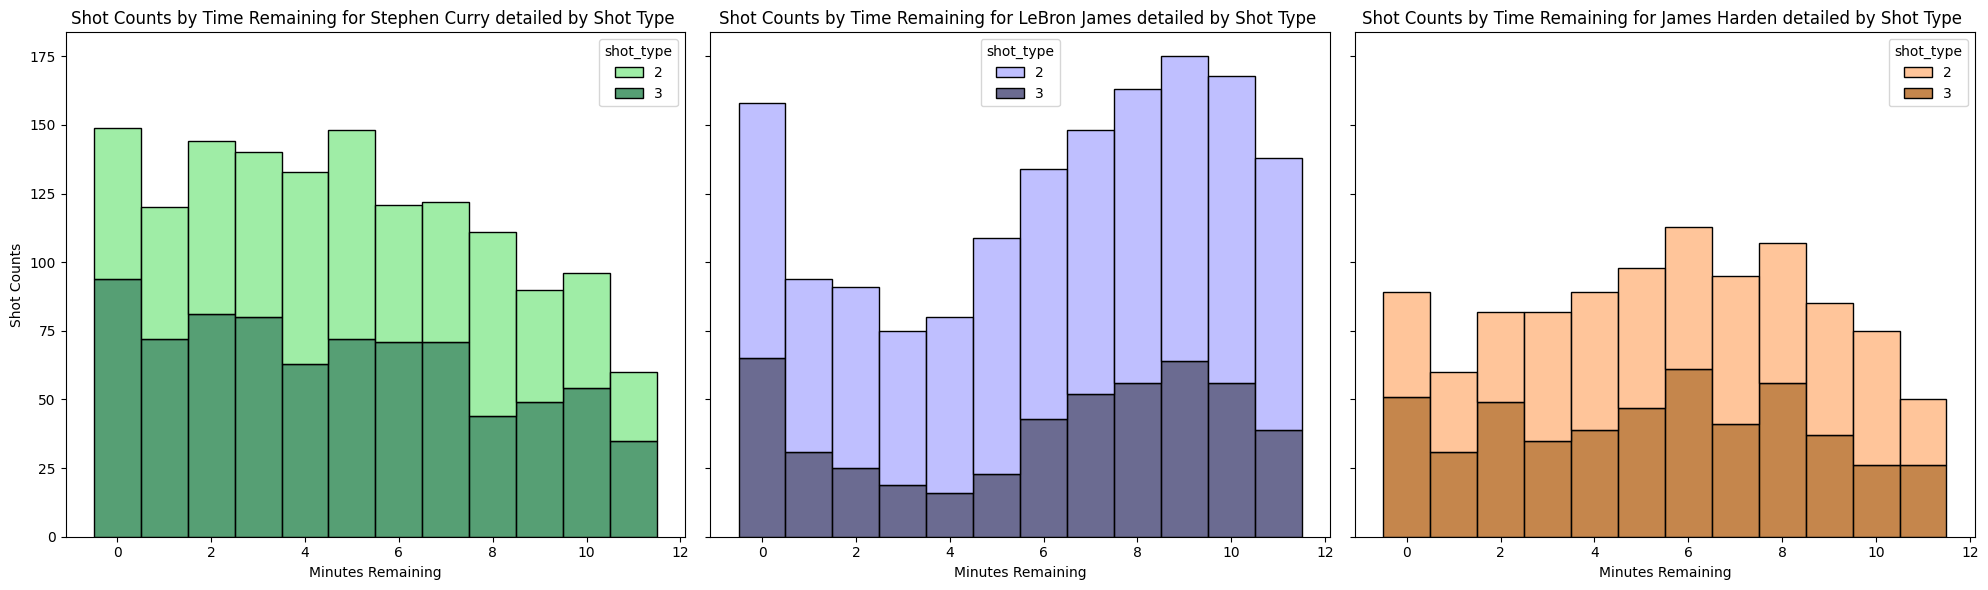

In [14]:




fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    sns.histplot(data=player_df, x='minutes_remaining', hue='shot_type', palette={2: light_colors[i], 3: dark_colors[i]}, multiple='stack', bins=range(0, 61, 5), stat='count', discrete=(True, True), ax=axes[i])
    axes[i].set_title(f'Shot Counts by Time Remaining for {player} detailed by Shot Type ')
    axes[i].set_xlabel('Minutes Remaining')
    axes[i].set_ylabel('Shot Counts')

plt.tight_layout()
plt.show()




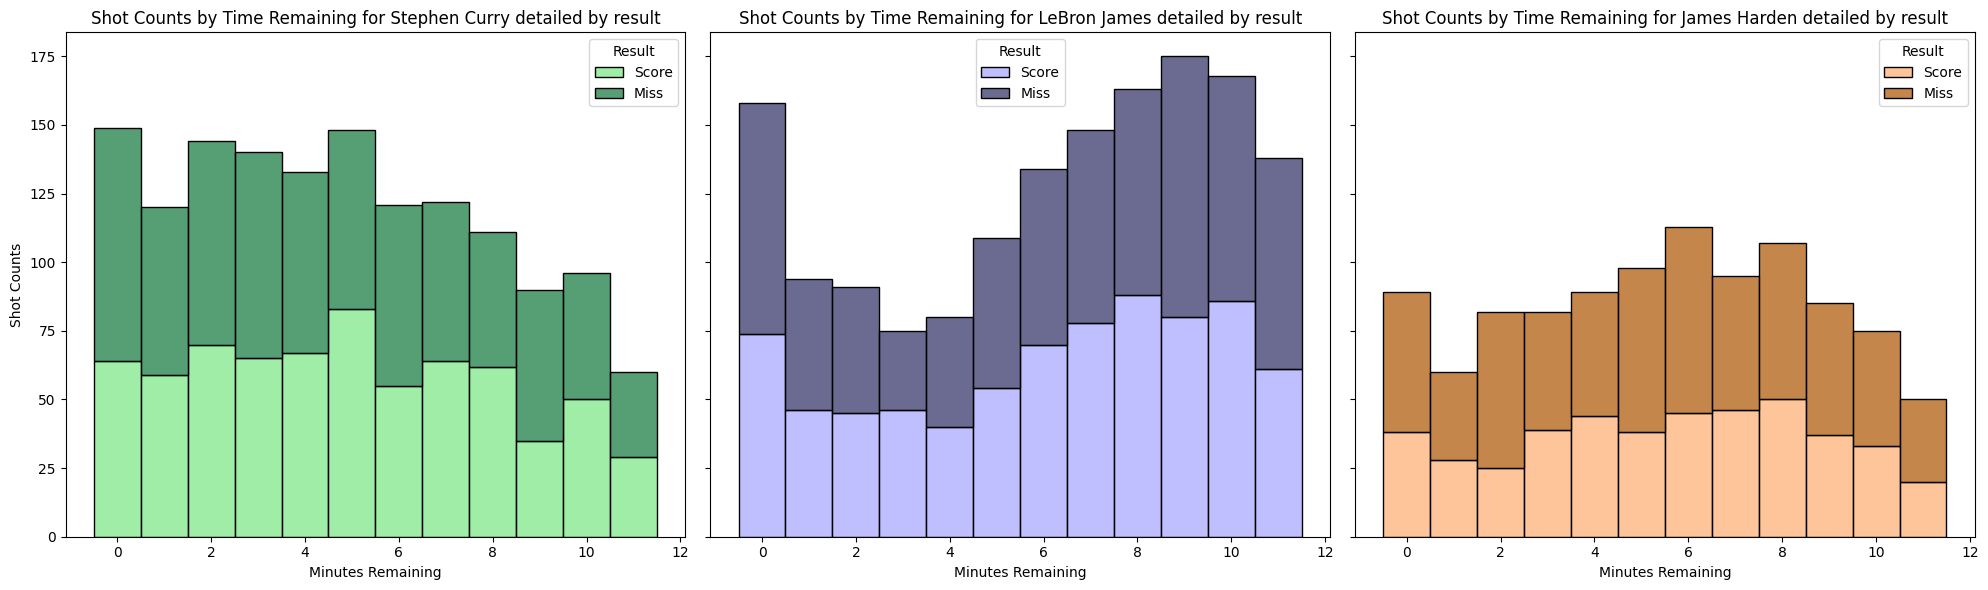

In [15]:

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    sns.histplot(data=player_df, x='minutes_remaining', hue='result', palette={True: light_colors[i], False: dark_colors[i]}, multiple='stack', bins=range(0, 61, 5), stat='count', discrete=(True, True), ax=axes[i])
    axes[i].set_title(f'Shot Counts by Time Remaining for {player} detailed by result')
    axes[i].set_xlabel('Minutes Remaining')
    axes[i].set_ylabel('Shot Counts')
    axes[i].legend(title='Result', labels=['Score', 'Miss'])

plt.tight_layout()
plt.show()


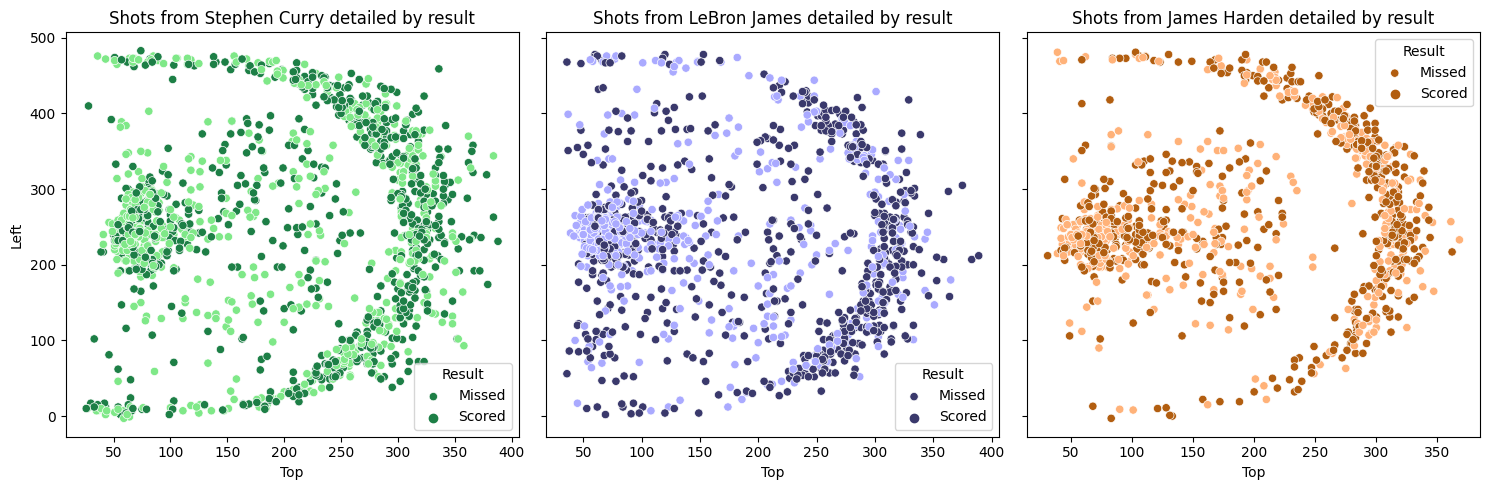

In [16]:
fig, axes = plt.subplots(1, len(players), figsize=(15, 5), sharey=True)

for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    ax = sns.scatterplot(data=player_df, x='top', y='left', hue='result', palette={True: light_colors[i], False: dark_colors[i]}, ax=axes[i])
    ax.set_title(f'Shots from {player} detailed by result')
    ax.set_xlabel('Top')
    ax.set_ylabel('Left')
    ax.legend(title='Result', labels=['Missed', 'Scored'])

plt.tight_layout()
plt.show()


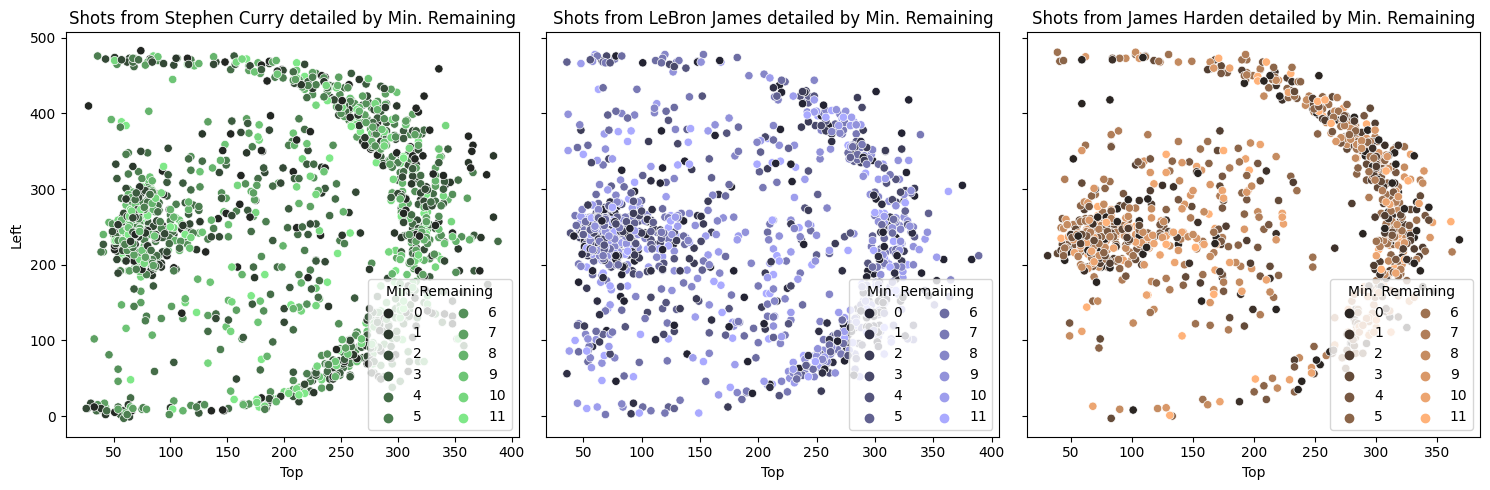

In [17]:

fig, axes = plt.subplots(1, len(players), figsize=(15, 5), sharey=True)

for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    player_light_color = light_colors[i]
    player_dark_color = dark_colors[i]
    
    # Generate palette with 10 shades of light color
    light_palette = sns.light_palette(player_dark_color, n_colors=0)
    # Generate palette with 10 shades of dark color
    dark_palette = sns.dark_palette(player_light_color, n_colors=12)
    
    custom_palette = light_palette + dark_palette
    
    ax = sns.scatterplot(data=player_df, x='top', y='left', hue='minutes_remaining', palette=custom_palette, ax=axes[i])
    ax.set_title(f'Shots from {player} detailed by Min. Remaining')
    ax.set_xlabel('Top')
    ax.set_ylabel('Left')
    ax.legend(title='Min. Remaining', loc='lower right', ncol=2)

plt.tight_layout()
plt.show()


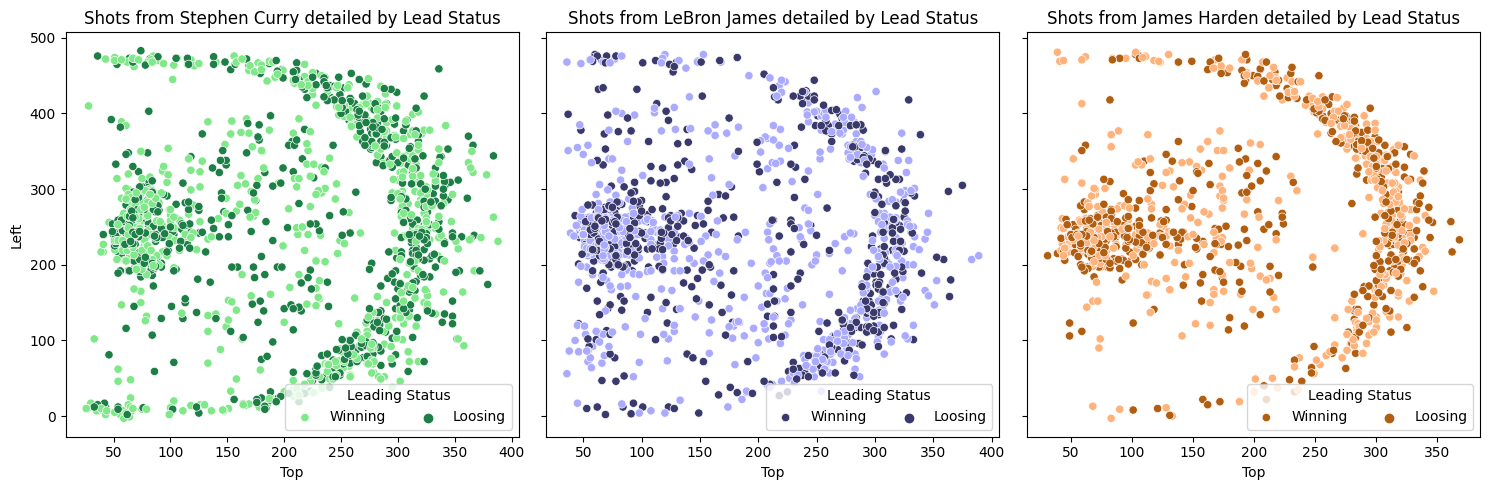

In [18]:
fig, axes = plt.subplots(1, len(players), figsize=(15, 5), sharey=True)

for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    player_light_color = light_colors[i]
    player_dark_color = dark_colors[i]
    
    # Generate palette with 12 shades of dark color
    dark_palette = sns.dark_palette(player_light_color, n_colors=12)
    custom_palette = dark_palette[::-1]  # Reverse the palette to start with the lightest color
    
    ax = sns.scatterplot(data=player_df, x='top', y='left', hue='lead', palette={True: light_colors[i], False: dark_colors[i]}, ax=axes[i])
    ax.set_title(f'Shots from {player} detailed by Lead Status')
    ax.set_xlabel('Top')
    ax.set_ylabel('Left')
    ax.legend(title='Leading Status', loc='lower right', ncol=2, labels=['Winning', 'Loosing'])

plt.tight_layout()
plt.show()


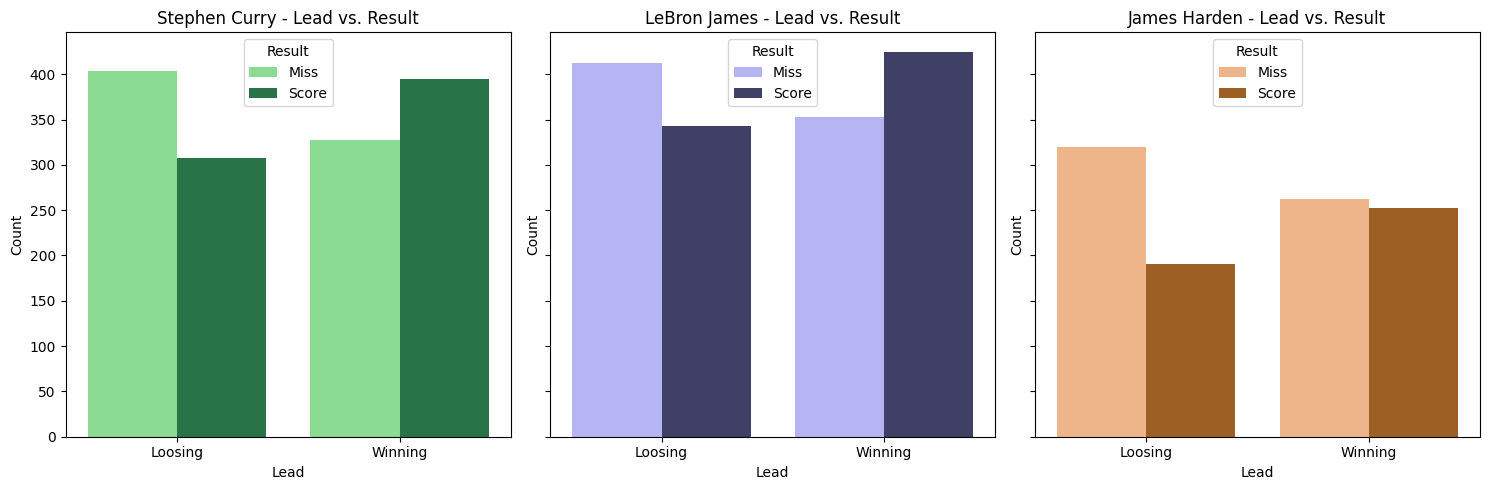

In [19]:

fig, axes = plt.subplots(1, len(players), figsize=(5*len(players), 5), sharey=True)


for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    player_light_color = light_colors[i]
    player_dark_color = dark_colors[i]
    player_palette = sns.color_palette([player_light_color, player_dark_color])
    

    sns.countplot(data=player_df, x='lead', hue='result', palette=player_palette, ax=axes[i])
    
    axes[i].set_title(f'{player} - Lead vs. Result')
    axes[i].set_xlabel('Lead')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Result', labels=['Miss', 'Score'], loc='upper center')
    axes[i].set_xticklabels(['Loosing', 'Winning'])

plt.tight_layout()
plt.show()


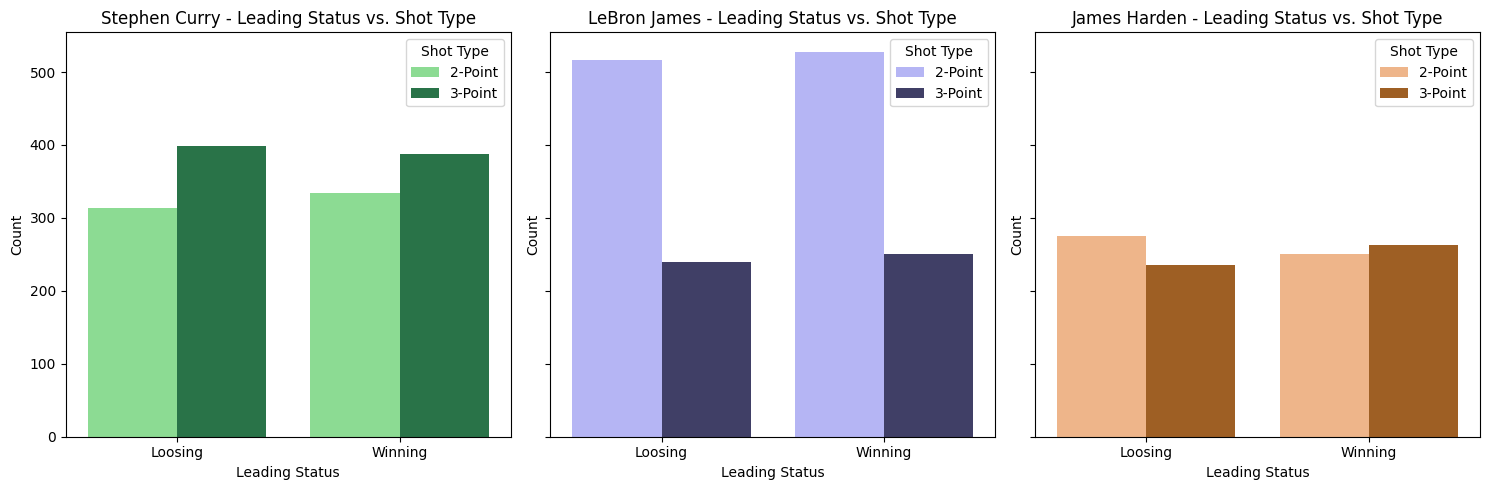

In [20]:


fig, axes = plt.subplots(1, num_players, figsize=(5*num_players, 5), sharey=True)

# Iterate over each player and create a separate bar plot
for i, player in enumerate(players):
    player_df = df[df['player'] == player]
    player_light_color = light_colors[i]
    player_dark_color = dark_colors[i]
    
    # Define the color palette for the player
    player_palette = sns.color_palette([player_light_color, player_dark_color])
    
    # Create the bar plot for the player
    sns.countplot(data=player_df, x='lead', hue='shot_type', palette=player_palette, ax=axes[i])
    
    # Set title, x-label, y-label, and legend for the subplot
    axes[i].set_title(f'{player} - Leading Status vs. Shot Type')
    axes[i].set_xlabel('Leading Status')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Shot Type', labels=['2-Point', '3-Point'])
    axes[i].set_xticklabels(['Loosing', 'Winning'])

plt.tight_layout()
plt.show()
